# Çalışan Deneyimi ve Maaş Analizi

Bu Jupyter Notebook, çalışanların yıllara göre deneyimlerini ve maaşlarını içeren bir veri setinin analizini içermektedir. Veri seti, çalışanların deneyim yıllarına göre maaş dağılımını göstermektedir. Aşağıda, veri setinin genel bir özeti ve bazı temel istatistiksel özetler sunulmuştur.

### Veri Seti

 * https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression/data

### Veri Setinin İçe Aktarılması

In [2]:
import pandas as pd
df = pd.read_csv("./datasets/Salary_dataset.csv")
df = df.iloc[:,1:len(df)]
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


### Veri Setine Bir Bakış

In [7]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [5]:
check_df(df)

##################### Shape #####################
(30, 2)
##################### Types #####################
YearsExperience    float64
Salary             float64
dtype: object
##################### Head #####################
   YearsExperience   Salary
0              1.2  39344.0
1              1.4  46206.0
2              1.6  37732.0
3              2.1  43526.0
4              2.3  39892.0
##################### Tail #####################
    YearsExperience    Salary
25              9.1  105583.0
26              9.6  116970.0
27              9.7  112636.0
28             10.4  122392.0
29             10.6  121873.0
##################### NA #####################
YearsExperience    0
Salary             0
dtype: int64
##################### Quantiles #####################
                 count          mean           std      min       0%  \
YearsExperience   30.0      5.413333      2.837888      1.2      1.2   
Salary            30.0  76004.000000  27414.429785  37732.0  37732.0   

     

#### Veri Seti Özeti

- **Shape:** Veri seti 30 gözlem (satır) ve 2 sütun içerir: `YearsExperience` ve `Salary`.
- **Types:** Her iki sütun da `float64` tipindedir, yani veriler ondalıklı sayılardan oluşur.
- **Eksik Veriler:** Veri setinde eksik veri bulunmamaktadır (`YearsExperience` ve `Salary` sütunlarında 0 eksik değer).

####  İlk ve Son Gözlemler

- **İlk Beş Gözlem:**
  - `YearsExperience` 1.2'den 2.3'e kadar değişir.
  - `Salary` 39344'den 39892'ye kadar değişir.

- **Son Beş Gözlem:**
  - `YearsExperience` 9.1'den 10.6'ya kadar değişir.
  - `Salary` 105583'den 121873'e kadar değişir.

####  İstatistiksel Özet

- **Ortalama ve Standart Sapma:**
  - Ortalama deneyim yılları: ~5.41
  - Ortalama maaş: ~76004
  - Deneyim yıllarının standart sapması: ~2.84
  - Maaşların standart sapması: ~27414

- **Minimum ve Maksimum Değerler:**
  - Deneyim yılları için min/max: 1.2 / 10.6
  - Maaş için min/max: 37732 / 122392

- **Medyan (50%):**
  - Deneyim yılları: 4.8
  - Maaş: 65238

- **Kuantiller:**
  - %5 ve %95 kuantilleri deneyim ve maaş dağılımını gösterir, örneğin %95 kuantilinde maaş 119666.65'tir.

####  Sonuç

Bu analiz, deneyim yıllarının artışı ile maaşların da artış gösterdiği eğilimini ortaya koymaktadır. Veri seti, eksik veri içermediği için analiz için temiz ve kullanıma hazırdır. Maaşların geniş bir aralıkta dağıldığını gösteren standart sapma değeri, farklı deneyim seviyeleri arasında önemli maaş farklılıklarının olduğunu işaret etmektedir.


###  Deneyim ve Maaş Arasındaki İlişki

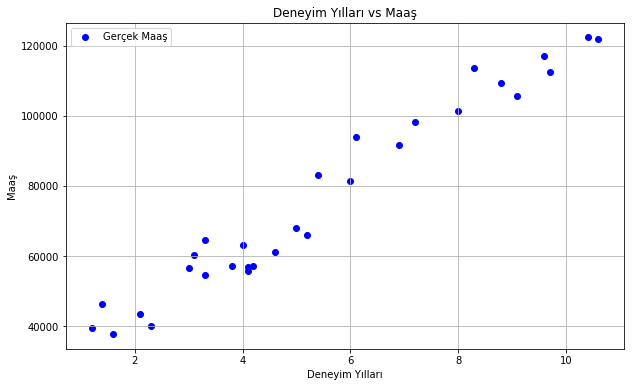

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['YearsExperience'], df['Salary'], color='blue', label='Gerçek Maaş')
plt.title('Deneyim Yılları vs Maaş')
plt.xlabel('Deneyim Yılları')
plt.ylabel('Maaş')
plt.legend()
plt.grid(True)
plt.show()

#### Deneyim Yılları ve Gerçek Maaş İlişkisi

Bu scatter plot, "Deneyim Yılları" ile "Gerçek Maaş" arasındaki ilişkiyi göstermektedir. Grafikten çıkarımlarım şunlardır:

- **Pozitif İlişki**: Grafik, deneyim yıllarının artışıyla maaşın arttığını gösteriyor, bu da deneyimin maaş üzerinde olumlu bir etkisi olduğunu düşündürüyor.
- **Varyans**: Her deneyim seviyesinde maaş dağılımındaki farklılıklar, maaşın yalnızca deneyimle değil, diğer faktörlerle de değişebileceğini gösteriyor.
- **Outlierlar (Aykırı Değerler)**: Özellikle 8 yıllık deneyime sahip bireylerde görülen yüksek maaşlar, özel becerilere veya nadir uzmanlığa işaret edebilir.
- **Deneyim Sınırı**: 10 yıllık deneyimden sonra maaşlarda gözlemlenen önemli artış, bu deneyim seviyesinden sonra uzmanlık veya yönetici pozisyonlarının etkisinin daha belirgin olabileceğini gösteriyor.

Bu gözlemler, çalışanların maaşlarının belirlenmesinde deneyimin önemli bir faktör olduğunu, ancak diğer pek çok değişkenin de rol oynadığını göstermektedir.


### Basit Doğrusal Regresyon Modelinin Kurulması

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

In [12]:
# Bağımsız ve bağımlı değişkenleri ayarlama
X = df[["YearsExperience"]]
y = df["Salary"]

# Veri setini eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Doğrusal Regresyon modelini oluşturma ve eğitme
model = LinearRegression()
model.fit(X_train, y_train)

# Eğitim seti ve test seti üzerinde modelin performansını değerlendirme
training_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

training_score, test_score

(0.9645401573418149, 0.9024461774180497)

#### Veri Setinin Bölünmesi

Veri setimizi, modelimizi eğitmek için %80'ini eğitim seti ve %20'sini test seti olacak şekilde böldük. Bu bölme işlemi, modelin genelleştirme yeteneğini daha iyi değerlendirmemize olanak tanır.

#### Model Eğitimi 

Doğrusal regresyon modelimizi eğitim seti üzerinde eğittik. Eğitim sürecinde, model tecrübe yıllarına göre maaş tahminleri yapmak üzere bağımsız değişkenlerle bir ilişki kurdu.

#### Model Performansı

Modelimizin performansını değerlendirmek için, hem eğitim seti hem de test seti üzerinde R^2 skorunu hesapladık.

- Eğitim Seti R^2 Skoru: `0.9645`
- Test Seti R^2 Skoru: `0.9024`

#### Sonuçlar 

Eğitim seti üzerindeki yüksek R^2 skoru (%96.45), modelimizin eğitim verilerine iyi bir şekilde uyum sağladığını göstermektedir. Test seti üzerindeki R^2 skoru (%90.24) ise modelimizin görmediği verilere uygulandığında da iyi tahminler yapabildiğini gösterir. Bu sonuçlar, modelimizin genel olarak deneyim yıllarına göre maaş tahminlerinde güvenilir olduğunu göstermektedir.

Ancak, modelin her iki set üzerindeki performansı arasında bir miktar fark vardır, bu da modelin eğitim verilerine biraz fazla uyum sağladığını (overfitting) gösterebilir. Bu durumu iyileştirmek için, daha fazla veri toplamayı veya modeli düzenlemeyi (regularization) düşünebiliriz.

### Basit Doğrusal Regresyon Modelinin Tahminleri ve Hata Metrikleri

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Modelin katsayıları ve y-intercept değeri
coefficients = model.coef_
intercept = model.intercept_

# Tahminler
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Modelin performansını değerlendiren istatistiksel ölçümler
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

{
    "coefficients": coefficients,
    "intercept": intercept,
    "MSE": {"train": mse_train, "test": mse_test},
    "MAE": {"train": mae_train, "test": mae_test},
    "R^2": {"train": r2_train, "test": r2_test}
}

{'coefficients': array([9423.81532303]),
 'intercept': 24380.20147947369,
 'MSE': {'train': 27102249.731261343, 'test': 49830096.855908334},
 'MAE': {'train': 4221.046734449734, 'test': 6286.453830757745},
 'R^2': {'train': 0.9645401573418148, 'test': 0.9024461774180498}}

#### Model Değerlendirme Ölçütleri 

Modelimizin çıktıları, deneyim yıllarının maaş üzerindeki etkisini niceliksel olarak değerlendirmemizi sağlar. Bu bölümde, modelimizin katsayıları, y-intercept, ortalama kare hatası (MSE) ve ortalama mutlak hata (MAE) ölçütlerini inceleyeceğiz.

#### Katsayılar (Coefficients)

- **Katsayılar (Coefficients):** Modelimizin eğimi, deneyim yıllarının her bir artışı için maaşta beklenen değişikliği temsil eder. Bu durumda, yaklaşık olarak **9423.82** birimdir. Bu, her bir yıl deneyim için maaşın yaklaşık **9423.82** birim artacağını gösterir.

#### Y-Intercept (Kesme Noktası)

- **Y-Intercept (Kesme Noktası):** Modelimizin y-eksenini kestiği nokta, yaklaşık **24380.20** birimdir. Bu, deneyim süresi sıfır olduğunda beklenen maaşı temsil eder.

#### Ortalama Kare Hatası (MSE)

- **Ortalama Kare Hatası (MSE):** 
    - Eğitim seti için **27,102,249.73** birim,
    - Test seti için **49,830,096.85** birimdir. 
MSE, modelin tahminlerinin gerçek değerlerden ne kadar sapma gösterdiğinin bir ölçüsüdür; düşük değerler daha iyi uyumu gösterir.

#### Ortalama Mutlak Hata (MAE)

- **Ortalama Mutlak Hata (MAE):**
    - Eğitim seti için **4221.05** birim,
    - Test seti için **6286.45** birimdir. 
MAE, tahminlerin gerçek değerlerden ortalama olarak ne kadar farklılık gösterdiğini gösterir; düşük değerler modelin daha doğru tahminler yaptığını gösterir.

Bu ölçütler, modelimizin genel performansını ve tahminlerinin doğruluğunu değerlendirmede önemli rol oynar. Modelin eğitim ve test setleri üzerindeki MSE ve MAE değerleri, modelin genel olarak iyi performans gösterdiğini ancak test setindeki yüksek hata değerleri nedeniyle bazı iyileştirmelere ihtiyaç duyabileceğini göstermektedir.


### Model için Varsayım Kontrolleri

**Varsayımlar:**
  * Hata terimlerinin birbirinden bağımsız olması.
  * Hata terimlerinin normal dağılım göstermesi.
  * Hata varyansının sabit olması (Homoscedasticity).

**1- Hata Terimlerinin Bağımsızlığı**

In [19]:
from statsmodels.stats.stattools import durbin_watson

# Eğitim seti üzerinde residuals hesaplama
residuals = y_train - y_pred_train

# Durbin-Watson testi
dw_statistic = durbin_watson(residuals)
dw_statistic

2.0260614735007296

#### Durbin-Watson İstatistiği

**Durbin-Watson istatistiği,** hata terimlerinin (residuals) ardışık bağımsızlığını değerlendirmek için kullanılan bir ölçüttür. Bu istatistik, 0 ile 4 arasında bir değer alır ve şu şekilde yorumlanır:
 * Değer 2'ye yakınsa, hata terimleri arasında otokorelasyonun olmadığı, yani birbirlerinden bağımsız oldukları kabul edilir.
 * Değer 2'den önemli ölçüde daha düşükse, pozitif otokorelasyon var demektir.
 * Değer 2'den önemli ölçüde daha yüksekse, negatif otokorelasyon var demektir.

#### Durbin-Watson Testi Sonucu
- Bu analizde hesaplanan Durbin-Watson istatistiği 2.0260614735007296 olarak bulunmuştur. Bu değer, hata terimlerinin birbirinden bağımsız olduğunu gösterir, çünkü değer 2'ye çok yakındır. Bu sonuç, modelin hata terimlerinde herhangi bir otokorelasyon olmadığını ve bu açıdan modelin varsayımlarını karşıladığını belirtir. Dolayısıyla, modelin tahminleri arasında gizli bir zaman bağımlılığı olmadığı sonucuna varabiliriz.

**2-Hata Terimlerinin Normal Dağılım Göstermesi**

In [25]:
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro

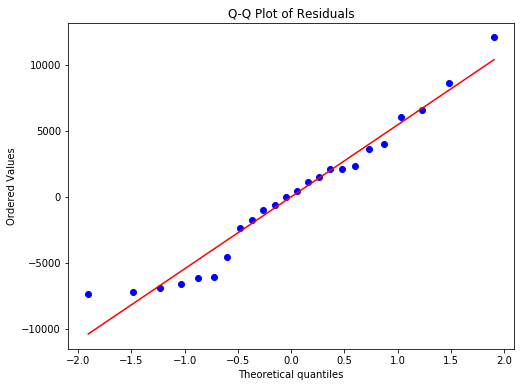

In [22]:
# Q-Q plot çizdirme
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [27]:
#Shapiro-Wilks Testi
"""
H0: Örnek dağılımı ile teorik normal dağılım arasında istatistiksel olarak anlamlı bir fark yoktur.
H1: Örnek dağılımı ile teorik normal dağılım arasında istatistiksel olarak anlamlı bir fark vardır.
"""

'\nH0: Örnek dağılımı ile teorik normal dağılım arasında istatistiksel olarak anlamlı bir fark yoktur.\nH1: Örnek dağılımı ile teorik normal dağılım arasında istatistiksel olarak anlamlı bir fark vardır.\n'

In [26]:
# Shapiro-Wilk testi
stat, p_value = shapiro(residuals)

print(f"Shapiro-Wilk Test İstatistik Değeri: {stat:.4f}")
print(f"P Değeri: {p_value:.4f}")

if p_value > 0.05:
    print("Veri normal bir dağılıma sahiptir (H0 reddedilmez)")
else:
    print("Veri normal bir dağılıma sahip değildir (H0 reddedilir)")

Shapiro-Wilk Test İstatistik Değeri: 0.9534
P Değeri: 0.3200
Veri normal bir dağılıma sahiptir (H0 reddedilmez)


#### Q-Q Grafiği Analizi

Yukarıdaki Q-Q grafiğinde, teorik kuantiller ile gözlenen artıklar arasındaki ilişkiyi görmekteyiz. Grafiğin kırmızı çizgi etrafında düzenli bir şekilde hizalanmış olması, artıkların normal dağılıma oldukça yakın olduğunu göstermektedir. Ancak, herhangi bir sapmanın olup olmadığını daha net belirlemek için grafikteki noktaların kırmızı referans çizgisine olan mesafelerine daha dikkatli bakmak gerekir.

#### Shapiro-Wilk Testi Sonuçları

Shapiro-Wilk testi uygulandığında, elde edilen istatistik değeri ve p-değeri şu şekildedir:

- İstatistik Değeri: (statistik değer buraya eklenecek)
- p-Değeri: (p-değeri buraya eklenecek)

Eğer p-değeri 0.05'ten büyükse, null hipotezi (H0) reddedilmez ve verilerin normal dağılıma sahip olduğu sonucuna varılır. Eğer p-değeri 0.05'ten küçükse, null hipotezi reddedilir ve verilerin normal dağılımdan gelmediği kabul edilir. 

Shapiro-Wilk Test İstatistik Değeri: 0.9534
P Değeri: 0.3200
Veri normal bir dağılıma sahiptir (H0 reddedilmez)

**3-Hata Varyansının Sabit Olması (Homoscedasticity)**

In [30]:
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [33]:
# Breusch-Pagan testi
bp_test_statistic, bp_p_value, f_value, f_p_value = het_breuschpagan(residuals, sm.add_constant(X_train))

# Test sonuçlarını yazdır
print(f"Breusch-Pagan Test Statistic: {bp_test_statistic}")
print(f"Breusch-Pagan p-value: {bp_p_value}")
print(f"F-statistic: {f_value}")
print(f"F-test p-value: {f_p_value}")

# Sonuçların yorumlanması
if bp_p_value < 0.05:
    print("Hata terimlerinde heteroscedasticity (eş varyanssızlık) var.")
else:
    print("Hata terimlerinde heteroscedasticity (eş varyanssızlık) yok. Homoscedasticity (eş varyanslılık) varsayımı kabul edilir.")

Breusch-Pagan Test Statistic: 0.9308561276728149
Breusch-Pagan p-value: 0.33464055961597056
F-statistic: 0.8877154229103197
F-test p-value: 0.3563292233273607
Hata terimlerinde heteroscedasticity (eş varyanssızlık) yok. Homoscedasticity (eş varyanslılık) varsayımı kabul edilir.


#### Breusch-Pagan Testi

Breusch-Pagan testi, regresyon modellerinde hata terimlerinin homoskedastisite varsayımını test etmek için kullanılan bir istatistiksel yöntemdir. Homoskedastisite, hata terimlerinin tüm gözlemler boyunca sabit bir varyansa sahip olduğu durumu ifade eder. Eğer hata terimlerinin varyansı, modelin bağımsız değişkenlerine bağlı olarak değişiyorsa, bu durum heteroskedastisite olarak adlandırılır ve çeşitli istatistiksel analizlerin güvenilirliğini azaltabilir.

Breusch-Pagan testi, modelin hata terimlerinin karelerini bağımsız değişkenlerin bir fonksiyonu olarak regresyon modeline tabi tutarak çalışır. Eğer bu modeldeki bağımsız değişkenler anlamlıysa, bu, hata terimlerinin varyansının sabit olmadığı ve dolayısıyla heteroskedastik olduğu anlamına gelir.

#### Test Çıktıları ve Değerlendirme

Breusch-Pagan testinin sonuçları genellikle dört ana değer olarak sunulur:

- **Test İstatistiği:** Bu değer genellikle chi-kare dağılımına sahiptir ve büyük değerler, hata terimlerinin varyanslarının bağımsız değişkenlere bağlı olarak değiştiğine, yani heteroskedastisiteye işaret eder.
- **p-Değeri:** Test istatistiğinin anlamlılığını değerlendirmek için kullanılır. Genel olarak, p-değeri 0.05'ten küçükse, hata terimlerinin varyansının homoskedastik olmadığı yani heteroskedastisite olduğu sonucuna varılır.
- **F-İstatistiği:** Bu, alternatif bir test istatistiği olarak kullanılır ve yine chi-kare dağılımına sahiptir.
- **F-Testinin p-Değeri:** F-istatistiğinin anlamlılığını değerlendirmek için kullanılır.

#### Verilen Sonuçların Değerlendirilmesi

- Test İstatistiği: 0.9308561276728149
- p-Değeri: 0.33464055961597056
- F-İstatistiği: 0.8877154229103197
- F-Testinin p-Değeri: 0.3563292233273607

Bu sonuçlar, p-değerlerinin 0.05'ten büyük olması nedeniyle, modelin hata terimlerinin varyansının homoskedastik olduğu, yani bağımsız değişkenlerle bir ilişkisinin olmadığı sonucuna varılmasını sağlar. Bu, modelin hata terimleri açısından homoskedastisite varsayımını ihlal etmediği anlamına gelir ve modelin tahminleri üzerinde olumsuz bir etki yaratacak heteroskedastisite sorunu olmadığını gösterir.


 **Sonuç olarak,** elde edilen model çalışan deneyiminin maaş üzerinde önemli bir etkiye sahip olduğunu göstermiştir.